# Avoid Downtown Seattle on the Weekend

Following the instructions in https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/crimeanalytics.md, I analyze Seattle crime data from the summer of 2014.  For starters, let's see the distribution of incidents by weekday.  Since some incidents last longer than a day, exclude them.

In [7]:
# crime data analysis for communicating data science course
#11/28/15 Noam

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('seattle_incidents_summer_2014.csv', parse_dates=[8,9,10])

In [8]:
#restrict to events that occur on single day

#so for event to have well-defined dat, take end_date==null or end-start<1 day
one_day_events = ((df['Occurred Date Range End'] - df['Occurred Date or Date Range Start']) < pd.Timedelta('1 day')) |  \
(df['Occurred Date Range End'].isnull())
print('we are keeping ' + str(100.*sum(one_day_events)/len(df)) + '% of events')


we are keeping 91.2565972116% of events


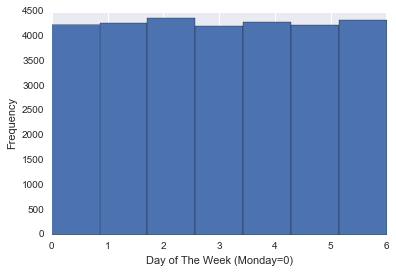

In [9]:
#start simple: what is weekday distribution of all crimes?
df[one_day_events]['Occurred Date or Date Range Start'].map(lambda x: x.dayofweek).plot(kind='hist',bins=7)
plt.xlabel('Day of The Week (Monday=0)')

# # Weekend Has Similar Overall Crime Rate 
Days 5 and 6 (Saturday and Sunday, respectively) look similar to the rest of the week in terms of total crime incidents.  Let's look instead at each crime type: does it occur more often on the weekend or during the work week?

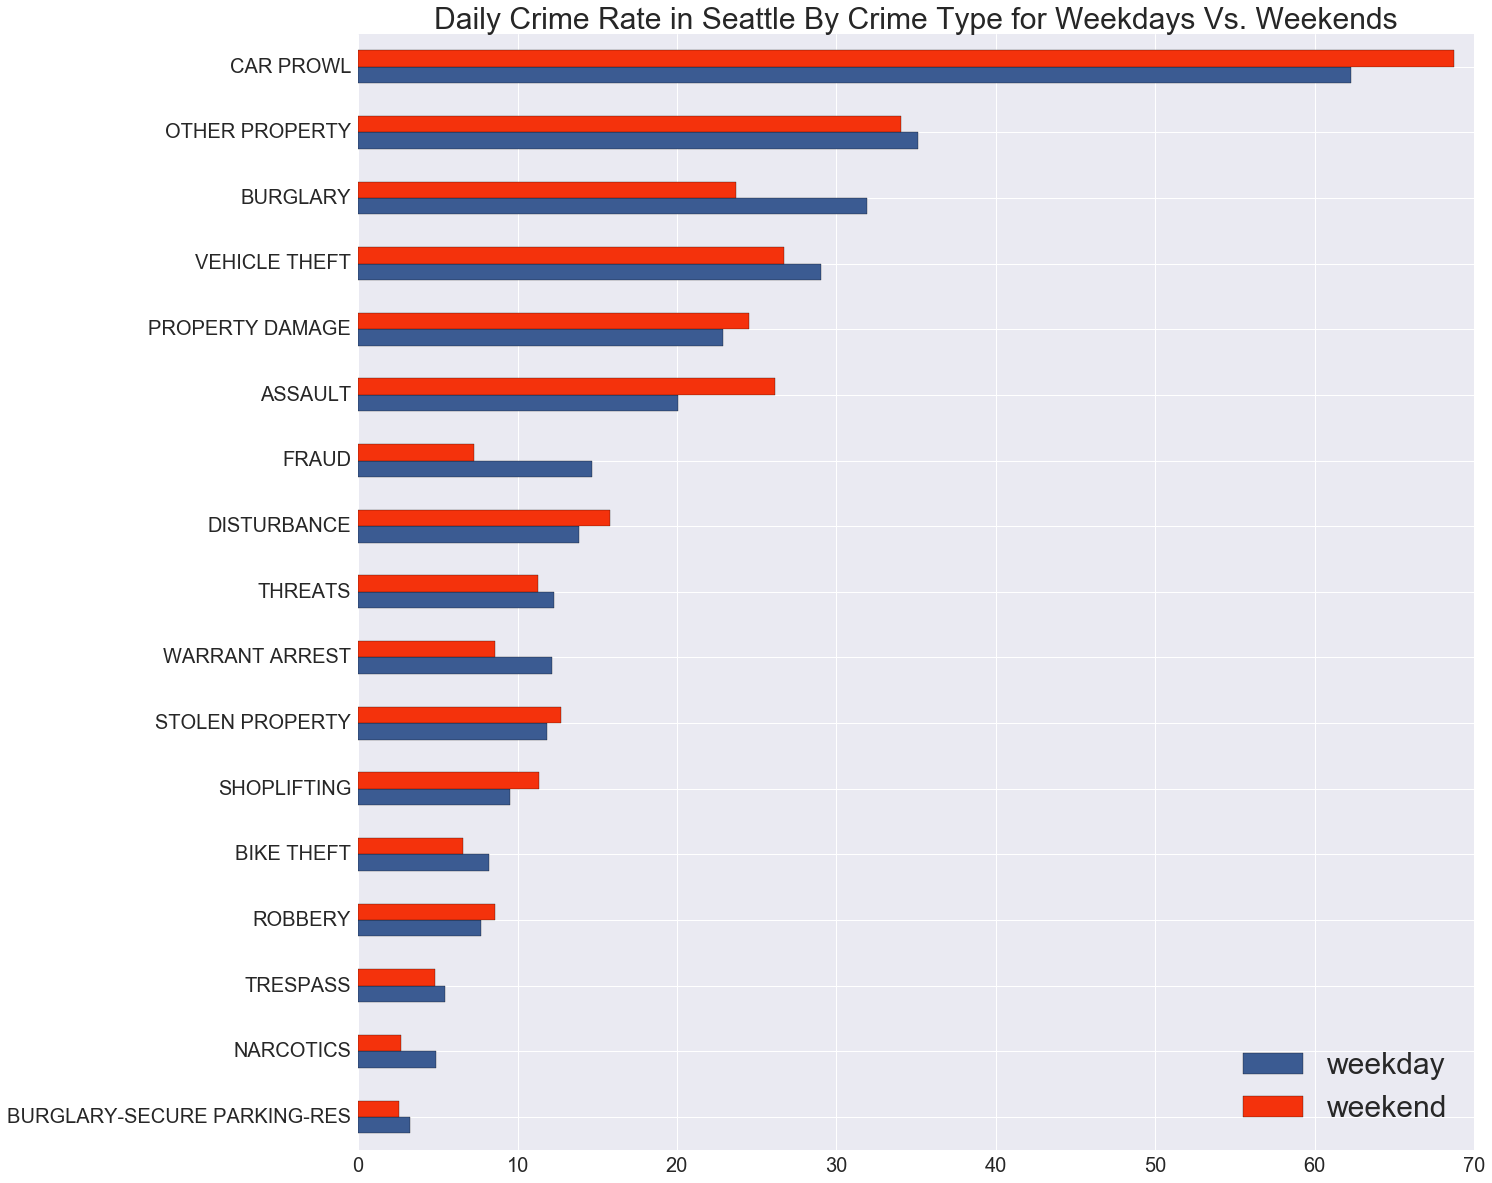

In [40]:
# normalization: how many weekend days and weekday days are there in time period of dataset
import datetime as dt
timestamps = df['Occurred Date or Date Range Start']
SAT = 5; SUN = 6
days = [dt.date.fromordinal(d) for d in  
            range( min(timestamps).toordinal(),
                   max(timestamps).toordinal()+1 )]
weekend_days = [d for d in days if d.weekday() in (SAT,SUN)]
num_weekend_days = len(weekend_days)
num_weekday_days = len(days) - num_weekend_days

#histogram of 'Summary Offense Description' frequency on weekday vs weekend
#Monday=0
on_weekend = df[one_day_events]['Occurred Date or Date Range Start'].map(lambda x: (x.dayofweek==5) | (x.dayofweek==6))
on_weekday = df[one_day_events]['Occurred Date or Date Range Start'].map(lambda x: (x.dayofweek!=5) & (x.dayofweek!=6))

weekend_counts = df[one_day_events][on_weekend]['Summarized Offense Description'].value_counts()
weekend_counts = weekend_counts.apply(lambda x: x*1./num_weekend_days)  #normalize: per day
weekday_counts = df[one_day_events][on_weekday]['Summarized Offense Description'].value_counts()
weekday_counts = weekday_counts.apply(lambda x: x*1./num_weekday_days)  #normalize: per day
combined_counts = pd.DataFrame({'weekend':weekend_counts, 'weekday':weekday_counts})

min_to_plot = 3  #don't plot if too few incidents
combined_counts = combined_counts[(combined_counts.weekend>min_to_plot) | (combined_counts.weekday>min_to_plot)]
combined_counts.sort_values(by='weekday').plot(kind='barh',figsize=(20,20),color=[sns.xkcd_rgb["denim blue"],sns.xkcd_rgb["vermillion"]],fontsize=20)
plt.legend(loc='lower right',fontsize=30)
plt.title('Daily Crime Rate in Seattle By Crime Type for Weekdays Vs. Weekends',fontsize=30)


It appears that Car Prowl and Assault incidents are more common on the weekend, whereas Burglury and Fraud are more common during the work-week.  It also appears that property crimes (automotive and other) are the most common incidents in Seattle.

## How Do Crime Incidents Differ by District?
We can repeat the analysis but look at district rather than crime type.  

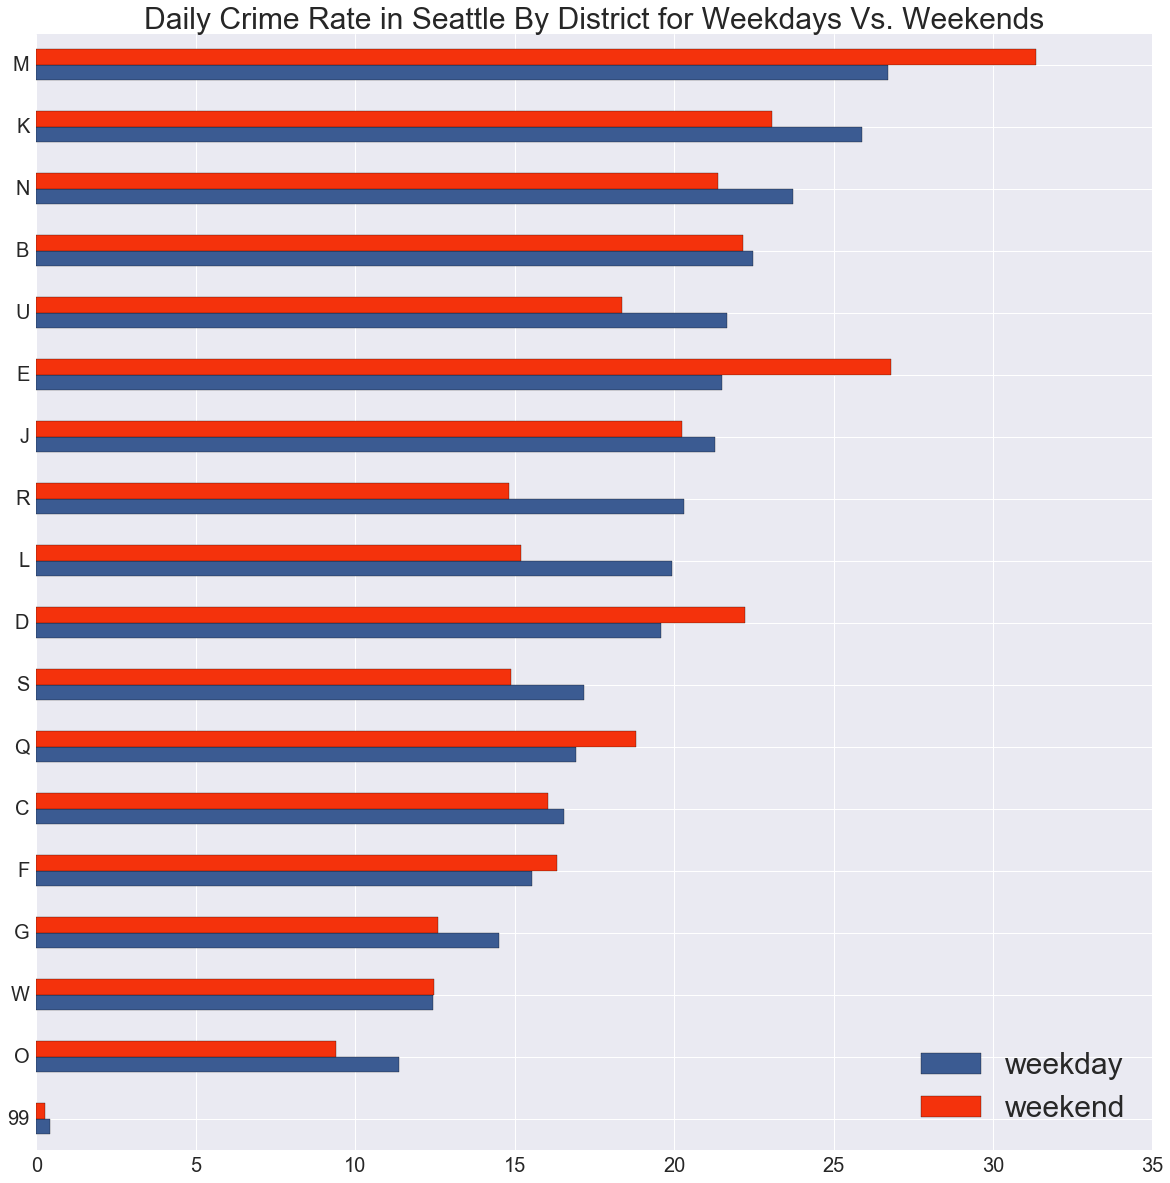

In [41]:
# repeat by district rather than by event type
df[one_day_events]['District/Sector'].value_counts()

weekend_counts = df[one_day_events][on_weekend]['District/Sector'].value_counts()
weekend_counts = weekend_counts.apply(lambda x: x*1./num_weekend_days)  #normalize: per day
weekday_counts = df[one_day_events][on_weekday]['District/Sector'].value_counts()
weekday_counts = weekday_counts.apply(lambda x: x*1./num_weekday_days)  #normalize: per day
combined_counts = pd.DataFrame({'weekend':weekend_counts, 'weekday':weekday_counts})
combined_counts.sort_values(by='weekday').plot(kind='barh',figsize=(20,20),color=[sns.xkcd_rgb["denim blue"],sns.xkcd_rgb["vermillion"]],fontsize=20)
plt.legend(loc='lower right',fontsize=30)
plt.title('Daily Crime Rate in Seattle By District for Weekdays Vs. Weekends',fontsize=30)
#figure shows most common crime types (per day) and which is more common on weekend than weekday
#precinct map: http://www.seattle.gov/police/maps/precinct_map.htm

#looks like E, M, D are downtown

There are several districts where crimes are more common on the weekend, for example:  M, E, D, Q.  Meanwhile, other districts such as K, N, U, R, and L have more crime incidents on the weekdays (during the work-week).  For reference a district map of Seattle can be found here:
http://www.seattle.gov/police/maps/precinct_map.htm

The districts with more crime on the weekend (M, E, D, Q) are at downtown Seattle.  Therefore, it may be advisable to avoid downtown Seattle on the weekends.